In [1]:
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set()

import numpy as np

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [18]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

In [19]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

In [20]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [21]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

In [22]:
# Plot a single example
px.imshow(train_data[7],width=500, height=500)

In [23]:
# Check our samples label
train_labels[7]

2

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

In [25]:
# Plot an example image and its label
px.imshow(train_data[17], color_continuous_scale="greys",width=500, height=500, title=class_names[train_labels[17]]) # change the colours to black & white


In [27]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

2022-07-01 12:53:04.171590: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [28]:
df_hystory = pd.DataFrame(history.history)
px.line(df_hystory,markers=True)#.plot(figsize=(10,7), xlabel="epochs");

In [29]:
# Make predictions with the most recent model
y_probs = model_11.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

2022-07-01 12:56:48.199892: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


array([[2.67575434e-10, 8.36208205e-15, 4.81271090e-05, 3.40116380e-08,
        1.23737031e-04, 2.73352921e-01, 3.39614161e-07, 8.82699415e-02,
        6.16736757e-03, 6.32037640e-01],
       [8.12876169e-05, 5.76152615e-15, 9.49077964e-01, 7.81001347e-07,
        8.87469482e-03, 8.59924382e-13, 4.17942218e-02, 5.20503676e-26,
        1.70956904e-04, 7.83169156e-08],
       [1.09286244e-04, 9.96481419e-01, 9.71140857e-09, 3.40284267e-03,
        2.56672706e-06, 1.08077262e-20, 3.80360325e-06, 1.49557388e-18,
        3.59247991e-08, 2.74247330e-14],
       [1.03193634e-04, 9.93369401e-01, 5.70150505e-08, 6.49507530e-03,
        2.15692580e-05, 1.15561582e-17, 1.01946025e-05, 3.01004813e-14,
        5.62861715e-07, 8.60029149e-12],
       [1.39543548e-01, 3.78132950e-06, 3.45286399e-01, 1.36686414e-02,
        3.66059318e-02, 5.40102095e-11, 4.62722242e-01, 3.91265193e-19,
        2.16952665e-03, 8.28050091e-08]], dtype=float32)

In [30]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [31]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [32]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[801,  11,  27,  81,   7,   1,  62,   0,  10,   0],
       [  2, 940,   2,  36,   7,   0,  13,   0,   0,   0],
       [ 34,   2, 662,  14, 166,   1, 108,   0,  13,   0],
       [ 67,  12,  12, 836,  33,   0,  28,   0,  12,   0],
       [  3,   1, 119,  44, 730,   0,  92,   0,   9,   2],
       [  0,   0,   0,   0,   0, 918,   0,  51,   7,  24],
       [205,   9, 171,  58, 141,   3, 397,   0,  16,   0],
       [  0,   0,   0,   0,   0,  44,   0, 921,   0,  35],
       [  3,   2,  34,  23,  10,  13,   7,   5, 901,   2],
       [  0,   0,   2,   0,   4,  37,   0,  47,   2, 908]])

In [34]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

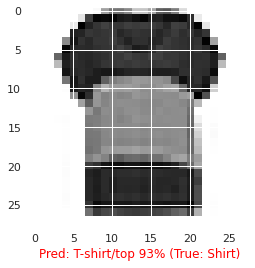

In [35]:
# Check out a random image as well as its prediction
plot_random_image(model=model_11, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [36]:
# Find the layers of our most recent model
model_11.layers

In [37]:
# Extract a particular layer
model_11.layers[1]

In [38]:
# Get the patterns of a layer in our network
weights, biases = model_11.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.38585985, -0.01683223, -0.48614594, -0.538174  ],
        [ 0.0917634 , -0.07343096, -0.2799134 ,  0.04825683],
        [ 0.43908095,  0.46483988, -0.64234936, -0.44439027],
        ...,
        [-0.25405538,  0.53794235, -0.15410861,  0.1502771 ],
        [-0.2308239 ,  0.4549205 ,  0.08331546, -0.3790482 ],
        [ 0.15038325,  0.13788234, -0.14806943, -0.01066024]],
       dtype=float32),
 (784, 4))

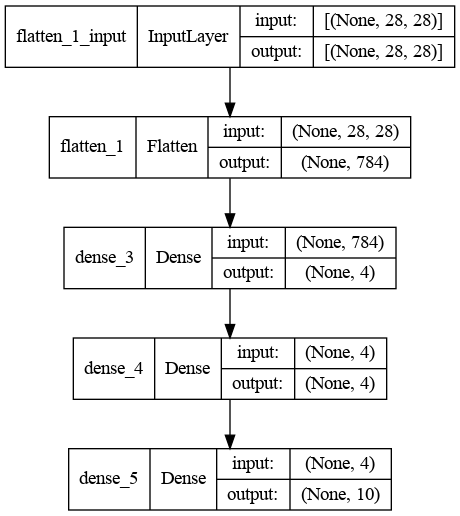

In [40]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_11, show_shapes=True)